# nomao dataset 

In [1]:
# Imports
import os
import sys
BASE_DIR = os.path.dirname(os.getcwd())
sys.path.append(BASE_DIR)
import torch
import numpy as np
import pandas as pd

# Opendataval
from dataval.dataloader import Register, DataFetcher, mix_labels, add_gauss_noise
from dataval.datavaluation import NDDV, NDSV
from dataval.experiment import ExperimentMediator

import warnings
warnings.filterwarnings("ignore")

/home/kunyu/anaconda3/envs/zyliang/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[KeOps] Compiling cuda jit compiler engine ... 
[KeOps] Warning : There were warnings or errors compiling formula :
In file included from /home/kunyu/anaconda3/envs/zyliang/lib/python3.10/site-packages/keopscore/binders/nvrtc/nvrtc_jit.cpp:21:
/home/kunyu/anaconda3/envs/zyliang/lib/python3.10/site-packages/keopscore/binders/nvrtc/nvrtc_jit.cpp: In function ‘int Compile(const char*, const char*, int, int, const char*)’:
<command-line>: error: ‘nvrtcGetCUBINSize’ was not declared in this scope; did you mean ‘nvrtcGetPTXSize’?
/home/kunyu/anaconda3/envs/zyliang/lib/python3.10/site-packages/keopscore/include/utils_pe.h:6:26: note: in definition of macro ‘NVRTC_SAFE_CALL’
    6 |     nvrtcResult result = x;                                       \
      |                          ^
/home/kunyu/anaconda3/envs/zyliang/lib/python3.10/site-packages/keopscore/binders/nvrtc/nvrtc_jit.cpp:90:21: note: in expansion of macro ‘nvrtcGetTARGETSize’
   90 |     NVRTC_SAFE_CALL(nvrtcGetTARGETSize(prog, &t

In [2]:
DataFetcher.datasets_available()

{'2dplanes',
 'MiniBooNE',
 'adult',
 'bbc',
 'bbc-embeddings',
 'breast_cancer',
 'challenge-iris',
 'cifar10',
 'cifar10-embeddings',
 'cifar100',
 'cifar100-embeddings',
 'creditcard',
 'diabetes',
 'digits',
 'echoMonths',
 'election',
 'electricity',
 'fashion',
 'fmnist-embeddings',
 'fried',
 'gaussian_classifier',
 'gaussian_classifier_high_dim',
 'imdb',
 'imdb-embeddings',
 'iris',
 'linnerud',
 'lowbwt',
 'mnist',
 'mnist-embeddings',
 'mv',
 'nomao',
 'pol',
 'stl10-embeddings',
 'stock',
 'svhn-embeddings',
 'vehicle_sensIT',
 'wave_energy',
 'webdata_wXa'}

## [Step 1] Set up an environment
`ExperimentMediator` is a fundamental concept in establishing the `opendataval` environment. It empowers users to configure hyperparameters, including a dataset, a type of synthetic noise, and a prediction model. With  `ExperimentMediator`, users can effortlessly compute various data valuation algorithms.

The following code cell demonstrates how to set up `ExperimentMediator` with a pre-registered dataset and a prediction model.
- Dataset: adult
- Model: sklearn's logistic regression model
- Metric: Classification accuracy

In [3]:
dataset_name = "nomao"
train_count, valid_count, test_count, meta_count = 1000, 100, 300, 100
noise_rate = 0.1
noise_kwargs = {'noise_rate': noise_rate}
max_epoch = 3
batch_size = 100
lr = 0.01
random_state = 42
train_kwargs = {"epochs": max_epoch, "batch_size": batch_size, "lr": lr}
model_name = "classifiermlp"   # "sklogreg"
# model_name = "LogisticRegression"
metric_name = "accuracy"
cache_dir = "../data_files/"
add_noise = mix_labels
noise_type = "mix_labels"
# device = 'cpu'
device = 'cuda:1' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'

exper_med = ExperimentMediator.model_factory_setup(
    dataset_name=dataset_name,
    cache_dir=cache_dir,  
    force_download=False,
    train_count=train_count,
    valid_count=valid_count,
    test_count=test_count,
    meta_count=meta_count,
    add_noise=add_noise, 
    noise_kwargs=noise_kwargs,
    train_kwargs=train_kwargs,
    random_state = random_state,
    model_name=model_name,
    metric_name=metric_name,
    device=device
)

Base line model metric_name='accuracy': perf=0.9166666865348816


A full list of registered datasets can be found [here](https://github.com/opendataval/opendataval/blob/main/opendataval/dataloader/fetcher.py#L121). A list of available  prediction models can be found [here](https://github.com/opendataval/opendataval/blob/main/opendataval/model/__init__.py#L111).

## [Step 2] Compute data values
`opendataval` provides various state-of-the-art data valuation algorithms. `ExperimentMediator.compute_data_values()` computes data values.

In [4]:
data_evaluators = [NDSV(mfg_epochs=50, base_model=model_name, meta_interval=4, Ntime=2, batch_size=batch_size, weight_decay=5e-4, meta_weight_decay=0,meta_hidden_size=10)]

In [5]:
%%time
# compute data values.
exper_med = exper_med.compute_data_values(data_evaluators=data_evaluators)

  0%|          | 0/50 [00:00<?, ?it/s]

  2%|▏         | 1/50 [00:02<02:13,  2.73s/it]

Epoch: 0, Test Accuracy: 41.00%


  4%|▍         | 2/50 [00:06<02:46,  3.47s/it]

Epoch: 1, Test Accuracy: 52.67%


  6%|▌         | 3/50 [00:11<03:06,  3.97s/it]

Epoch: 2, Test Accuracy: 56.67%


  8%|▊         | 4/50 [00:15<02:58,  3.89s/it]

Epoch: 3, Test Accuracy: 61.67%


 10%|█         | 5/50 [00:17<02:25,  3.23s/it]

Epoch: 4, Test Accuracy: 66.00%


 12%|█▏        | 6/50 [00:20<02:25,  3.32s/it]

Epoch: 5, Test Accuracy: 68.00%


 14%|█▍        | 7/50 [00:21<01:48,  2.52s/it]

Epoch: 6, Test Accuracy: 71.67%


 16%|█▌        | 8/50 [00:24<01:49,  2.62s/it]

Epoch: 7, Test Accuracy: 79.67%


 18%|█▊        | 9/50 [00:27<01:51,  2.72s/it]

Epoch: 8, Test Accuracy: 85.00%


 20%|██        | 10/50 [00:28<01:36,  2.40s/it]

Epoch: 9, Test Accuracy: 85.33%


 22%|██▏       | 11/50 [00:33<01:54,  2.94s/it]

Epoch: 10, Test Accuracy: 85.33%


 24%|██▍       | 12/50 [00:37<02:11,  3.45s/it]

Epoch: 11, Test Accuracy: 85.67%


 26%|██▌       | 13/50 [00:41<02:09,  3.50s/it]

Epoch: 12, Test Accuracy: 88.33%


 28%|██▊       | 14/50 [00:44<02:05,  3.50s/it]

Epoch: 13, Test Accuracy: 90.33%


 30%|███       | 15/50 [00:46<01:46,  3.05s/it]

Epoch: 14, Test Accuracy: 92.33%


 32%|███▏      | 16/50 [00:51<01:55,  3.40s/it]

Epoch: 15, Test Accuracy: 90.67%


 34%|███▍      | 17/50 [00:55<02:06,  3.83s/it]

Epoch: 16, Test Accuracy: 89.67%


 36%|███▌      | 18/50 [00:59<02:01,  3.79s/it]

Epoch: 17, Test Accuracy: 88.67%


 38%|███▊      | 19/50 [01:00<01:31,  2.94s/it]

Epoch: 18, Test Accuracy: 88.67%


 40%|████      | 20/50 [01:05<01:48,  3.62s/it]

Epoch: 19, Test Accuracy: 88.33%


 42%|████▏     | 21/50 [01:09<01:43,  3.56s/it]

Epoch: 20, Test Accuracy: 87.67%


 44%|████▍     | 22/50 [01:13<01:46,  3.81s/it]

Epoch: 21, Test Accuracy: 87.00%


 46%|████▌     | 23/50 [01:17<01:46,  3.94s/it]

Epoch: 22, Test Accuracy: 88.67%


 48%|████▊     | 24/50 [01:20<01:33,  3.58s/it]

Epoch: 23, Test Accuracy: 89.33%


 50%|█████     | 25/50 [01:23<01:26,  3.45s/it]

Epoch: 24, Test Accuracy: 90.00%


 52%|█████▏    | 26/50 [01:26<01:20,  3.36s/it]

Epoch: 25, Test Accuracy: 91.67%


 54%|█████▍    | 27/50 [01:31<01:23,  3.63s/it]

Epoch: 26, Test Accuracy: 92.33%


 56%|█████▌    | 28/50 [01:36<01:31,  4.18s/it]

Epoch: 27, Test Accuracy: 91.67%


 58%|█████▊    | 29/50 [01:40<01:29,  4.25s/it]

Epoch: 28, Test Accuracy: 91.67%


 60%|██████    | 30/50 [01:43<01:17,  3.88s/it]

Epoch: 29, Test Accuracy: 89.67%


 62%|██████▏   | 31/50 [01:45<00:58,  3.06s/it]

Epoch: 30, Test Accuracy: 90.33%


 64%|██████▍   | 32/50 [01:46<00:48,  2.67s/it]

Epoch: 31, Test Accuracy: 89.33%


 66%|██████▌   | 33/50 [01:48<00:38,  2.24s/it]

Epoch: 32, Test Accuracy: 90.33%


 68%|██████▊   | 34/50 [01:50<00:38,  2.43s/it]

Epoch: 33, Test Accuracy: 91.33%


 70%|███████   | 35/50 [01:55<00:44,  2.97s/it]

Epoch: 34, Test Accuracy: 89.67%


 72%|███████▏  | 36/50 [01:58<00:44,  3.15s/it]

Epoch: 35, Test Accuracy: 91.00%


 74%|███████▍  | 37/50 [01:59<00:32,  2.51s/it]

Epoch: 36, Test Accuracy: 89.00%


 76%|███████▌  | 38/50 [02:03<00:32,  2.74s/it]

Epoch: 37, Test Accuracy: 90.67%


 78%|███████▊  | 39/50 [02:03<00:23,  2.17s/it]

Epoch: 38, Test Accuracy: 90.33%


 80%|████████  | 40/50 [02:05<00:21,  2.13s/it]

Epoch: 39, Test Accuracy: 91.00%


 82%|████████▏ | 41/50 [02:07<00:17,  1.98s/it]

Epoch: 40, Test Accuracy: 89.67%


 84%|████████▍ | 42/50 [02:10<00:16,  2.11s/it]

Epoch: 41, Test Accuracy: 90.00%


 86%|████████▌ | 43/50 [02:14<00:19,  2.74s/it]

Epoch: 42, Test Accuracy: 90.33%


 88%|████████▊ | 44/50 [02:18<00:18,  3.09s/it]

Epoch: 43, Test Accuracy: 90.00%


 90%|█████████ | 45/50 [02:22<00:17,  3.48s/it]

Epoch: 44, Test Accuracy: 90.67%


 92%|█████████▏| 46/50 [02:24<00:12,  3.03s/it]

Epoch: 45, Test Accuracy: 89.67%


 94%|█████████▍| 47/50 [02:26<00:08,  2.79s/it]

Epoch: 46, Test Accuracy: 90.00%


 96%|█████████▌| 48/50 [02:28<00:05,  2.58s/it]

Epoch: 47, Test Accuracy: 90.33%


 98%|█████████▊| 49/50 [02:32<00:02,  2.84s/it]

Epoch: 48, Test Accuracy: 91.67%


100%|██████████| 50/50 [02:36<00:00,  3.12s/it]

Epoch: 49, Test Accuracy: 91.33%
Elapsed time NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0005, meta_weight_decay=0, meta_hidden_size=10): 0:02:36.186182
CPU times: user 1h 31s, sys: 690 ms, total: 1h 32s
Wall time: 2min 36s


## [Step 3] Evaluate data values

In [6]:
from dataval.experiment.exper_methods import (
    dynamic_data_state,
    dynamic_data_values,
    extract_loss,
    discover_corrupted_sample,
    noisy_detection,
    remove_high_low,
    remove_high_value,
    remove_low_value,
    add_low_high,
    add_high_value,
    add_low_value,
    save_dataval
)
from matplotlib import pyplot as plt

In [7]:
# Saving the results with percent 10%
percent = 0.1
output_dir = f"../results/NDDV_traj_{dataset_name}_{model_name}_{noise_type}_{noise_rate=}_{train_count=}_{percent=}/"
exper_med.set_output_directory(output_dir)
output_dir

'../results/NDDV_traj_nomao_classifiermlp_mix_labels_noise_rate=0.1_train_count=1000_percent=0.1/'

### Noisy data detection 
- `noisy_detection` performs the noisy data detection task and evaluates the F1-score of each data valuation algorithm's prediction. The higher, the better.  
  - noisy data: mislabeled data

In [8]:
exper_med.evaluate(noisy_detection, save_output=True)

,kmeans_f1
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0005, meta_weight_decay=0, meta_hidden_size=10)",0.571429


### Discover noisy samples
- `discover_corrupted_sample` visualizes how well noisy data points are identified when a fraction of dataset is inspected. 

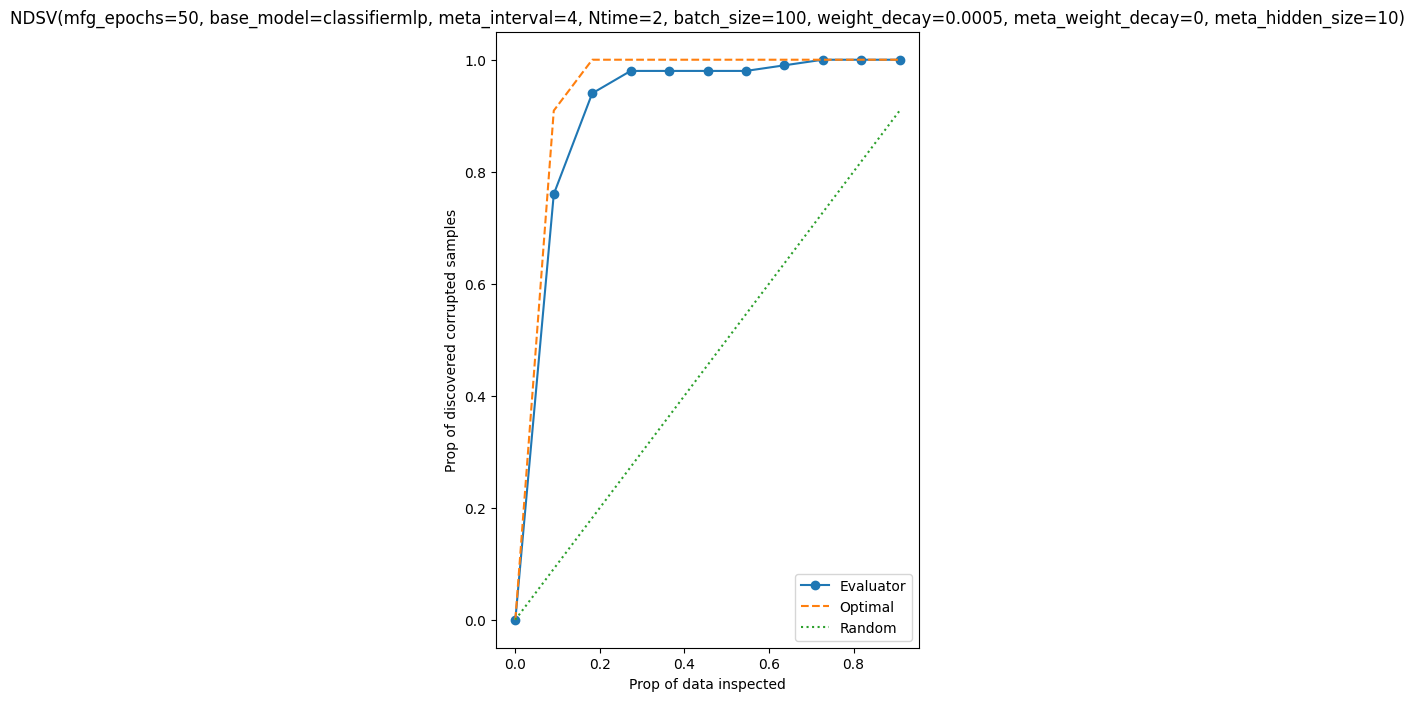

In [9]:
fig = plt.figure(figsize=(12, 8))
df, fig = exper_med.plot(discover_corrupted_sample, fig, col=2, percnet=percent, save_output=True)

### Save train and meta loss

In [10]:
exper_med.compute_train_loss(extract_loss, save_output=True)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
train_loss,9.346177e-04,6.927912e-04,7.484388e-04,7.938993e-04,8.022512e-04,7.301720e-04,0.000647,0.000504,0.000268,-0.000091,...,-0.000856,-0.000765,-0.000939,-0.000936,-0.000957,-0.000992,-0.000945,-0.000868,-0.000889,-0.000959
meta_loss,-1.822973e-07,-9.770740e-08,-8.192068e-08,-1.406385e-07,-3.609761e-07,-7.775188e-07,-0.000002,-0.000003,-0.000007,-0.000011,...,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016,-0.000016


### Data points state trajectory

In [11]:
state_time, state_traject = exper_med.compute_data_state(dynamic_data_state)


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.font_manager import FontProperties
from scipy.interpolate import PchipInterpolator
from scipy.interpolate import CubicSpline

font_path = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman_Bold.ttf'
font_prop_title = FontProperties(fname=font_path, size=18)
font_prop_xy = FontProperties(fname=font_path, size=16)
font_prop_ax = FontProperties(fname=font_path, size=14)

def plot_state_trajectories(time_span, trajectories):

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)
    end_values = trajectories[-1, :, 0]
    sorted_indices = np.argsort(end_values)[1:]
    
    colors = ['coral', 'darkviolet']
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=4)
    
    fine_time_span = np.linspace(time_span.min(), time_span.max(), 100)
    
    for i in sorted_indices:
        trajectory = trajectories[:, i, 0]
        trajectory = np.nan_to_num(trajectory, nan=np.nanmean(trajectory), posinf=np.max(trajectory), neginf=np.min(trajectory))
        interp_func = CubicSpline(time_span, trajectory, bc_type='not-a-knot')
        fine_trajectory = interp_func(fine_time_span)
        
        color_index = np.where(sorted_indices == i)[0][0] / (len(sorted_indices) - 1)
        color = cmap(color_index)
            
        ax.plot(fine_time_span, fine_trajectory, color=color, alpha=0.2)
    
    ax.set_xlabel(r"$t$", fontproperties=font_prop_xy)
    ax.set_ylabel(r"$X_t$", fontproperties=font_prop_xy)
    ax.set_title('Dataset: nomao', fontproperties=font_prop_title)
    ax.tick_params(axis='both', which='major', labelsize=14)
    
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontproperties(font_prop_ax)


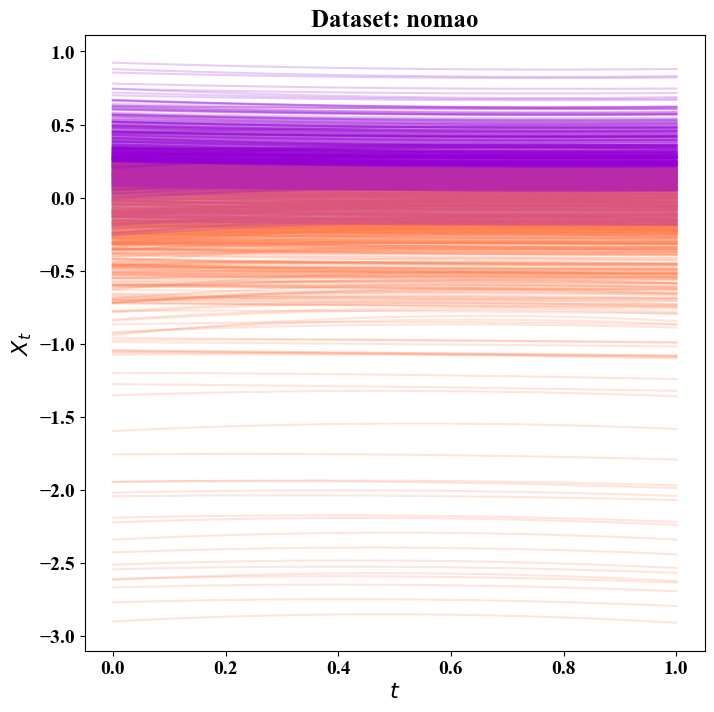

In [13]:
plot_state_trajectories(state_time, state_traject)
plt.savefig(f"../results/NDDV_traj_{dataset_name}_{model_name}_{noise_type}_{noise_rate=}_{train_count=}_{percent=}/state_traj.pdf", bbox_inches='tight', dpi=600)

### Data points value trajectory

In [14]:
value_time, value_traject = exper_med.compute_state_values(dynamic_data_values)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.font_manager import FontProperties
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline
from scipy.stats import gaussian_kde

font_path = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman_Bold.ttf'
font_prop_title = FontProperties(fname=font_path, size=18)
font_prop_xy = FontProperties(fname=font_path, size=16)
font_prop_ax = FontProperties(fname=font_path, size=14)

def plot_value_trajectories(time_span, trajectories):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)
    end_values = trajectories[-1, :, 0]
    sorted_indices = np.argsort(end_values)
    
    density = gaussian_kde(end_values)
    end_values_density = density(end_values)

    min_density = np.min(end_values_density)
    max_density = np.max(end_values_density)
    normalized_density = (end_values_density - min_density) / (max_density - min_density)
    
    colors = ['coral', 'darkviolet']
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=4)
    
    fine_time_span = np.linspace(time_span.min(), time_span.max(), 100)
    
    for i in sorted_indices:
        trajectory = trajectories[:, i, 0]
        trajectory = np.nan_to_num(trajectory, nan=np.nanmean(trajectory), posinf=np.max(trajectory), neginf=np.min(trajectory))
        interp_func = CubicSpline(time_span, trajectory, bc_type='not-a-knot')
        fine_trajectory = interp_func(fine_time_span)
        
        alpha = 1 - normalized_density[i]
        alpha = np.clip(alpha, 0.1, 0.3)
        
        color_index = np.where(sorted_indices == i)[0][0] / (len(sorted_indices) - 1)
        color = cmap(color_index)
            
        ax.plot(fine_time_span, fine_trajectory, color=color, alpha=0.2)
        
    ax.set_xlabel(r"$t$", fontproperties=font_prop_xy)
    ax.set_ylabel(r"$X_t$", fontproperties=font_prop_xy)
    ax.set_title('Dataset: nomao', fontproperties=font_prop_title)
    ax.tick_params(axis='both', which='major', labelsize=12)
    
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontproperties(font_prop_ax)

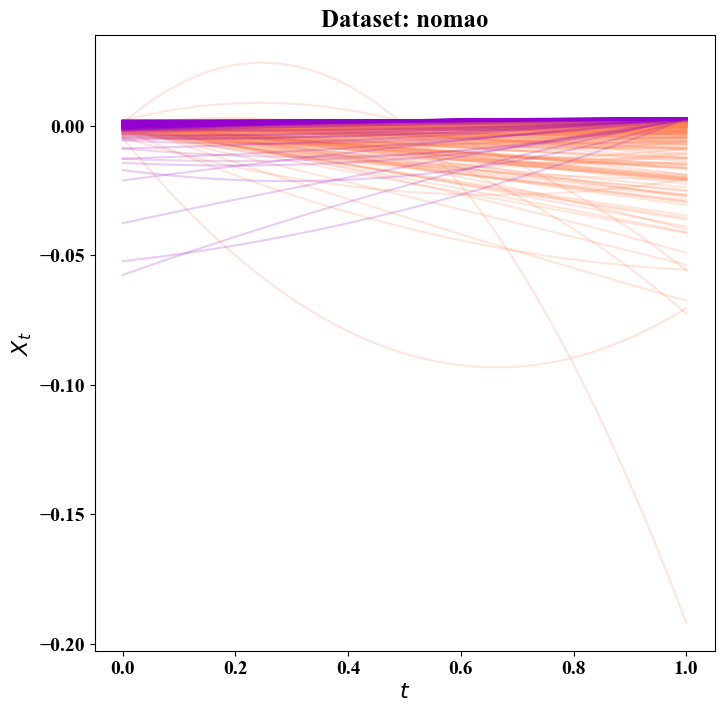

In [16]:
plot_value_trajectories(value_time, value_traject)
plt.savefig(f"../results/NDDV_traj_{dataset_name}_{model_name}_{noise_type}_{noise_rate=}_{train_count=}_{percent=}/value_traj.pdf", bbox_inches='tight', dpi=600)

### Point removal experiment
- `remove_high_low` performs the point removal experiment. Each data valution algorithm, it provides two curves: one is removing data in a descending order (orange), the other is in an ascending order (blue). As for the orange (resp. blue) curve, the lower (resp. upper), the better. 

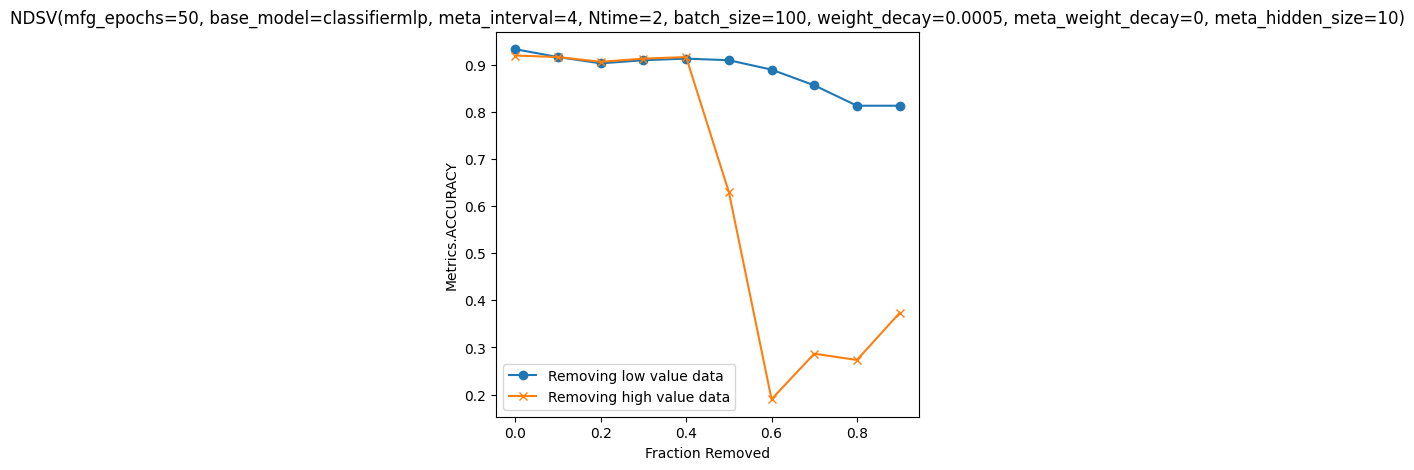

In [17]:
fig = plt.figure(figsize=(12, 5))
df_resp, fig = exper_med.plot(remove_high_low, fig, col=2, percnet=percent, save_output=True)

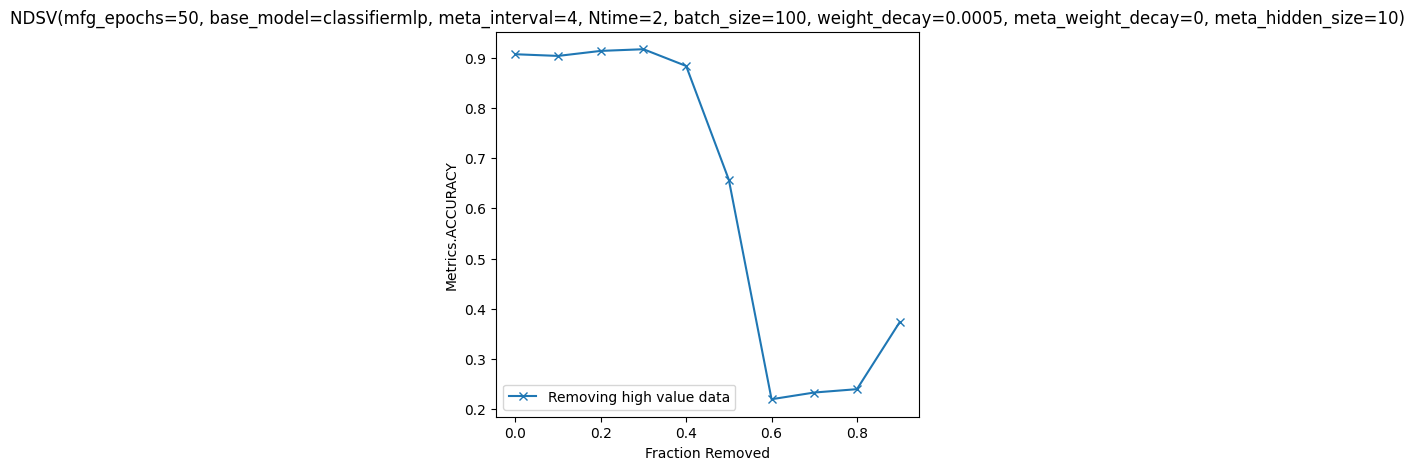

In [18]:
fig = plt.figure(figsize=(12, 5))
df, fig = exper_med.plot(remove_high_value, fig, col=2, percnet=percent, save_output=True)

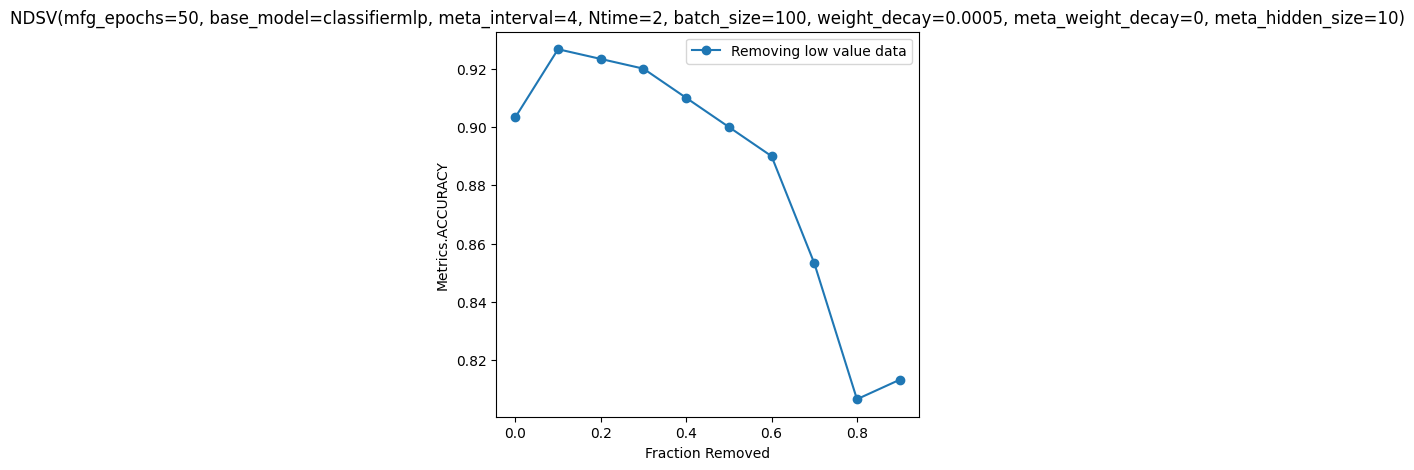

In [19]:
fig = plt.figure(figsize=(12, 5))
df, fig = exper_med.plot(remove_low_value, fig, col=2, percnet=percent, save_output=True)

In [20]:
df_resp # it provides complete information for generating point-removal experiment figures.

,remove_least_influential_first_Metrics.ACCURACY,remove_most_influential_first_Metrics.ACCURACY,axis
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0005, meta_weight_decay=0, meta_hidden_size=10)",0.933333,0.92,0.0
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0005, meta_weight_decay=0, meta_hidden_size=10)",0.916667,0.916667,0.1
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0005, meta_weight_decay=0, meta_hidden_size=10)",0.903333,0.906667,0.2
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0005, meta_weight_decay=0, meta_hidden_size=10)",0.91,0.913333,0.3
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0005, meta_weight_decay=0, meta_hidden_size=10)",0.913333,0.916667,0.4
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0005, meta_weight_decay=0, meta_hidden_size=10)",0.91,0.63,0.5
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0005, meta_weight_decay=0, meta_hidden_size=10)",0.89,0.19,0.6
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0005, meta_weight_decay=0, meta_hidden_size=10)",0.856667,0.286667,0.7
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0005, meta_weight_decay=0, meta_hidden_size=10)",0.813333,0.273333,0.8
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0005, meta_weight_decay=0, meta_hidden_size=10)",0.813333,0.373333,0.9


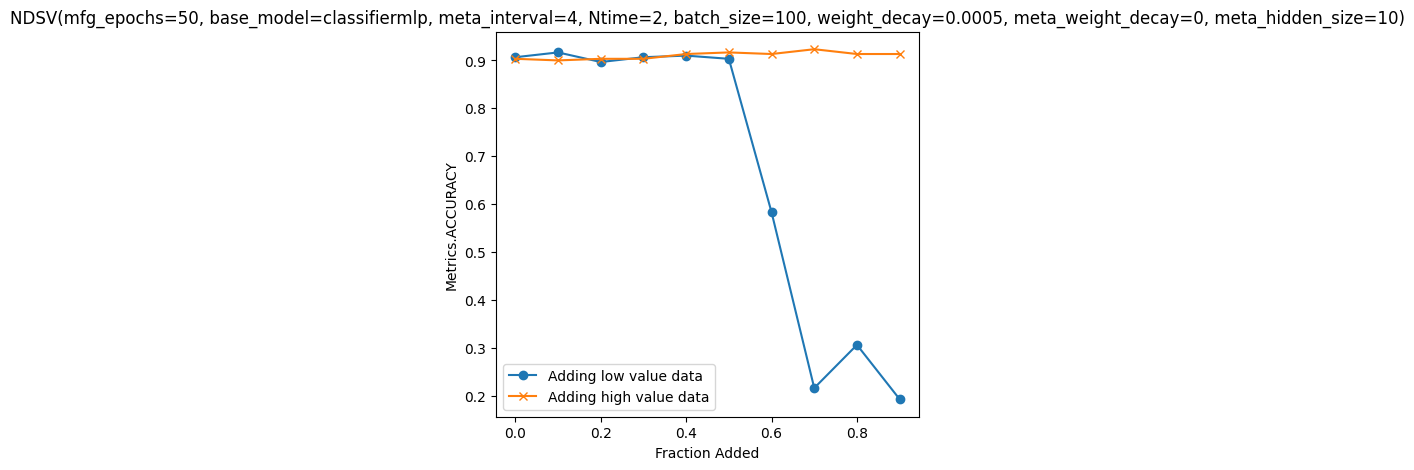

In [21]:
fig = plt.figure(figsize=(12, 5))
df_addp, fig = exper_med.plot(add_low_high, fig, col=2, percnet=percent, save_output=True)

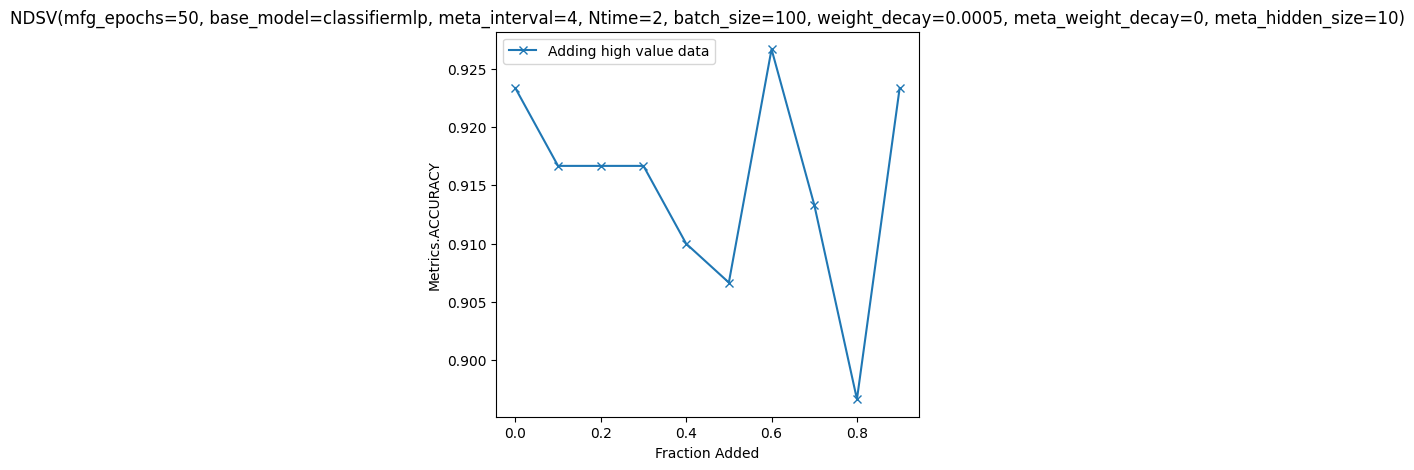

In [22]:
fig = plt.figure(figsize=(12, 5))
df, fig = exper_med.plot(add_high_value, fig, col=2, percnet=percent, save_output=True)

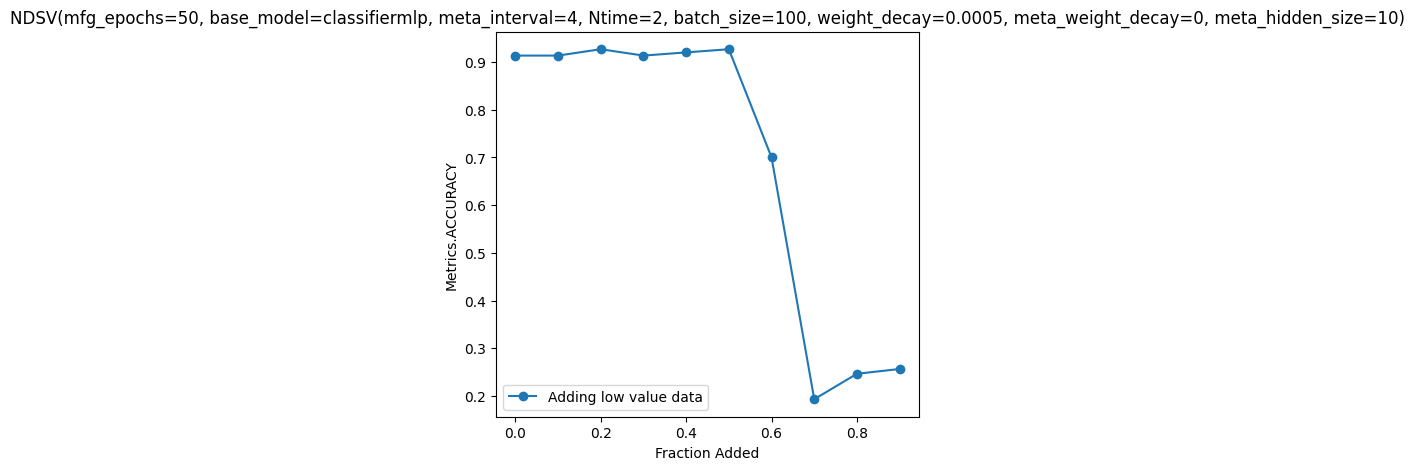

In [23]:
fig = plt.figure(figsize=(12, 5))
df, fig = exper_med.plot(add_low_value, fig, col=2, percnet=percent, save_output=True)

In [24]:
df_addp

,add_least_influential_first_Metrics.ACCURACY,add_most_influential_first_Metrics.ACCURACY,axis
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0005, meta_weight_decay=0, meta_hidden_size=10)",0.193333,0.913333,0.9
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0005, meta_weight_decay=0, meta_hidden_size=10)",0.306667,0.913333,0.8
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0005, meta_weight_decay=0, meta_hidden_size=10)",0.216667,0.923333,0.7
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0005, meta_weight_decay=0, meta_hidden_size=10)",0.583333,0.913333,0.6
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0005, meta_weight_decay=0, meta_hidden_size=10)",0.903333,0.916667,0.5
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0005, meta_weight_decay=0, meta_hidden_size=10)",0.91,0.913333,0.4
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0005, meta_weight_decay=0, meta_hidden_size=10)",0.906667,0.903333,0.3
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0005, meta_weight_decay=0, meta_hidden_size=10)",0.896667,0.903333,0.2
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0005, meta_weight_decay=0, meta_hidden_size=10)",0.916667,0.9,0.1
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0005, meta_weight_decay=0, meta_hidden_size=10)",0.906667,0.903333,0.0


### Save data values
- `save_dataval` stores computed data values at `{output_dir}/save_dataval.csv`.

In [25]:
exper_med.evaluate(save_dataval, save_output=True)

,indices,data_values
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0005, meta_weight_decay=0, meta_hidden_size=10)",28212,-0.003542
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0005, meta_weight_decay=0, meta_hidden_size=10)",11792,0.002648
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0005, meta_weight_decay=0, meta_hidden_size=10)",10157,0.002619
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0005, meta_weight_decay=0, meta_hidden_size=10)",22197,0.002428
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0005, meta_weight_decay=0, meta_hidden_size=10)",7577,0.002328
...,...,...
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0005, meta_weight_decay=0, meta_hidden_size=10)",29699,-0.191916
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0005, meta_weight_decay=0, meta_hidden_size=10)",13695,0.002649
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0005, meta_weight_decay=0, meta_hidden_size=10)",15770,-0.00211
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0005, meta_weight_decay=0, meta_hidden_size=10)",8161,0.002735


### percent is 0.1

In [26]:
# Saving the results with percent 10%
percent = 0.1
output_dir = f"../results/NDDV_traj_{dataset_name}_{model_name}_{noise_type}_{noise_rate=}_{train_count=}_{percent=}/"
exper_med.set_output_directory(output_dir)
output_dir

'../results/NDDV_traj_nomao_classifiermlp_mix_labels_noise_rate=0.1_train_count=1000_percent=0.1/'

In [27]:
exper_med.evaluate(noisy_detection, save_output=True)

,kmeans_f1
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0005, meta_weight_decay=0, meta_hidden_size=10)",0.571429


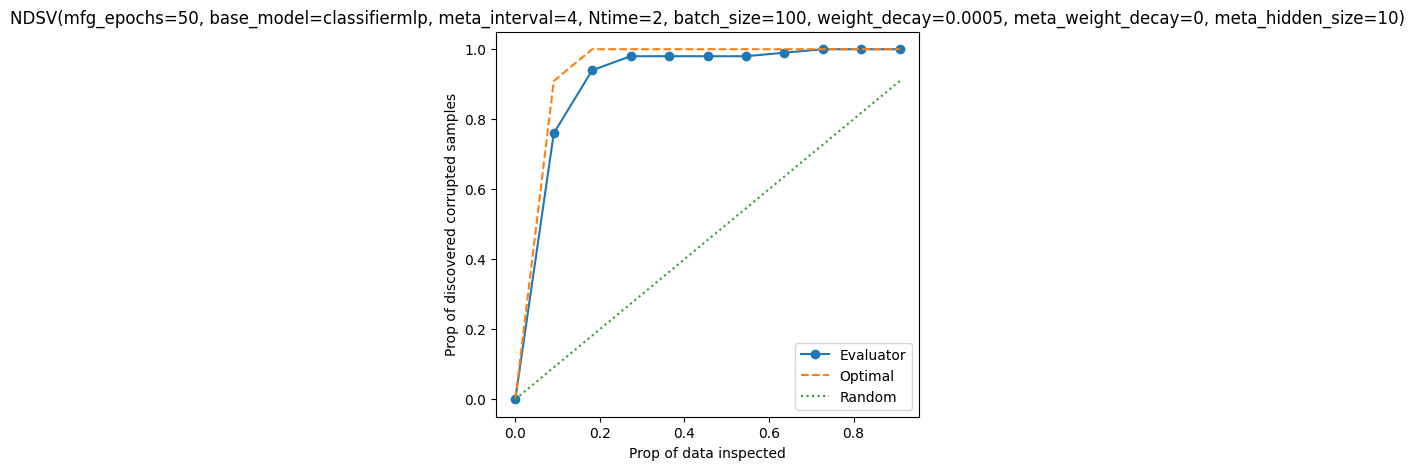

In [28]:
fig = plt.figure(figsize=(12, 5))
df, fig = exper_med.plot(discover_corrupted_sample, fig, col=2, percnet=percent, save_output=True)

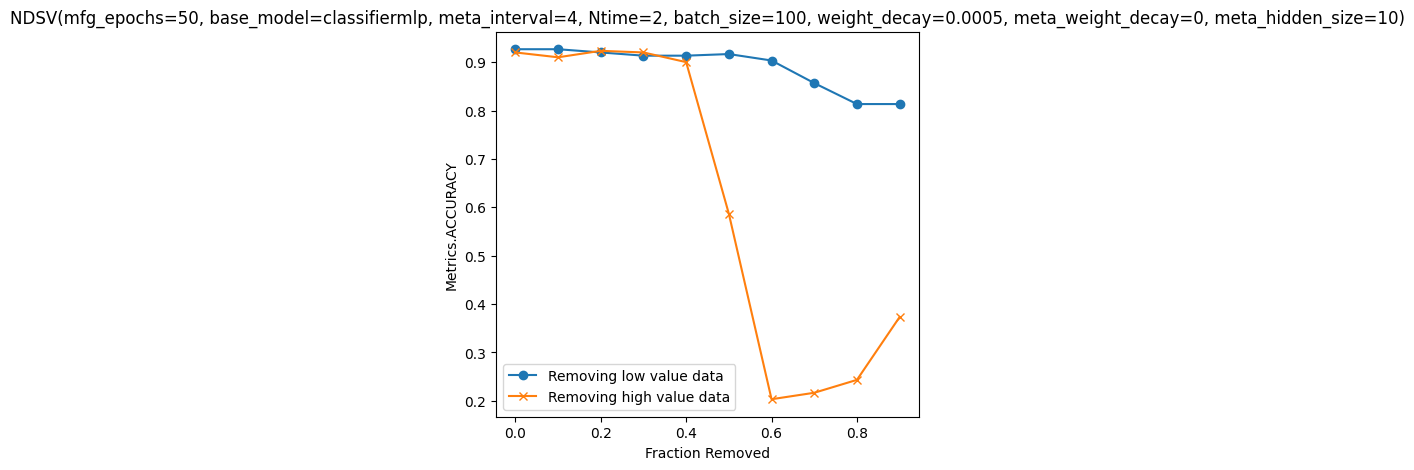

In [29]:
fig = plt.figure(figsize=(12, 5))
df_resp, fig = exper_med.plot(remove_high_low, fig, col=2, percnet=percent, save_output=True)

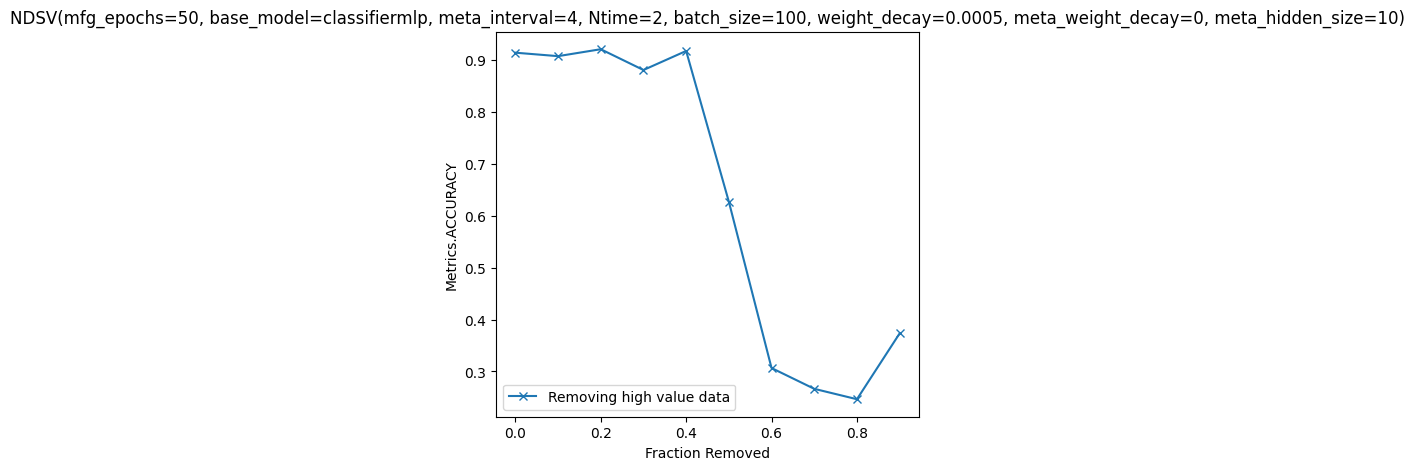

In [30]:
fig = plt.figure(figsize=(12, 5))
df, fig = exper_med.plot(remove_high_value, fig, col=2, percnet=percent, save_output=True)

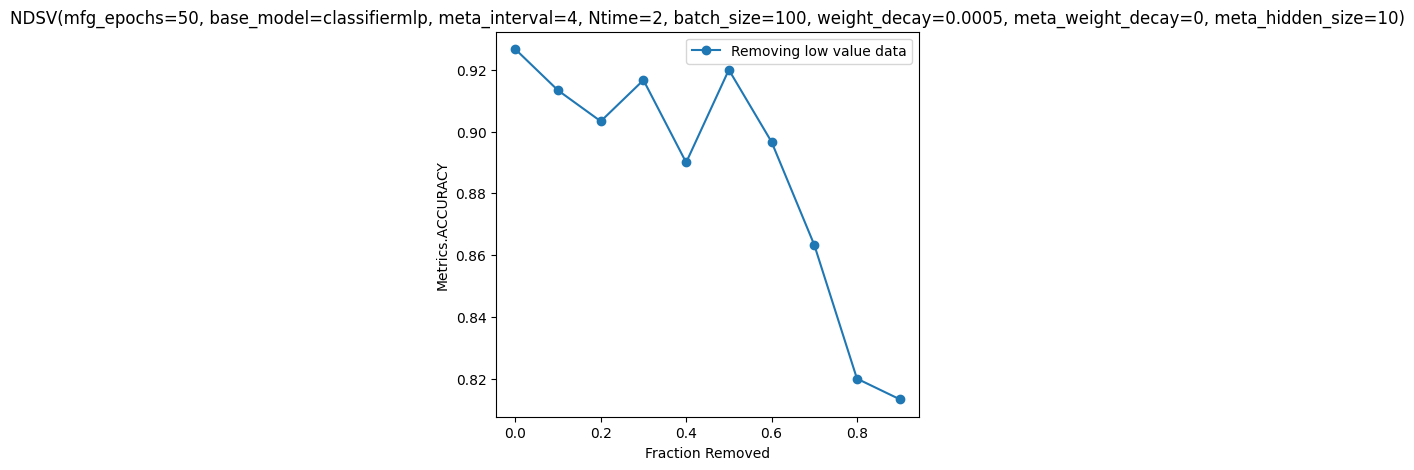

In [31]:
fig = plt.figure(figsize=(12, 5))
df, fig = exper_med.plot(remove_low_value, fig, col=2, percnet=percent, save_output=True)

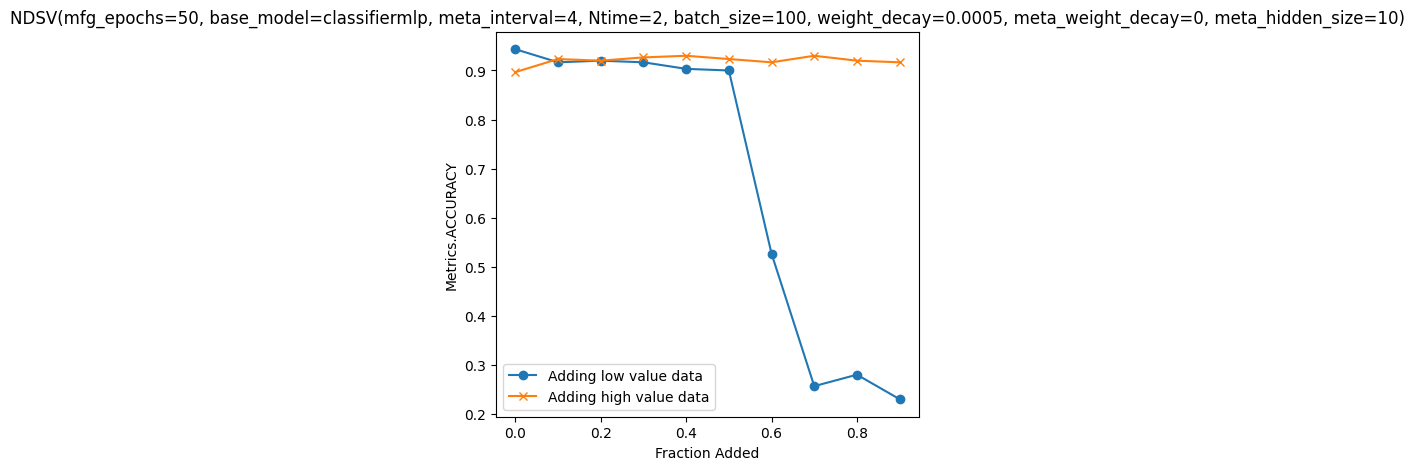

In [32]:
fig = plt.figure(figsize=(12, 5))
df_resp, fig = exper_med.plot(add_low_high, fig, col=2, percnet=percent, save_output=True)

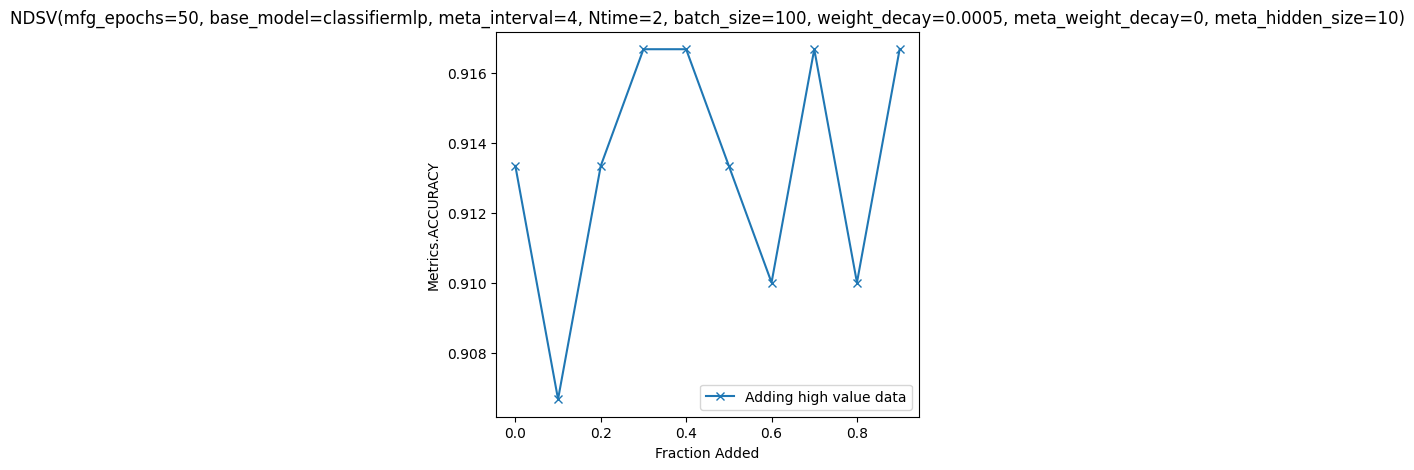

In [33]:
fig = plt.figure(figsize=(12, 5))
df, fig = exper_med.plot(add_high_value, fig, col=2, percnet=percent, save_output=True)

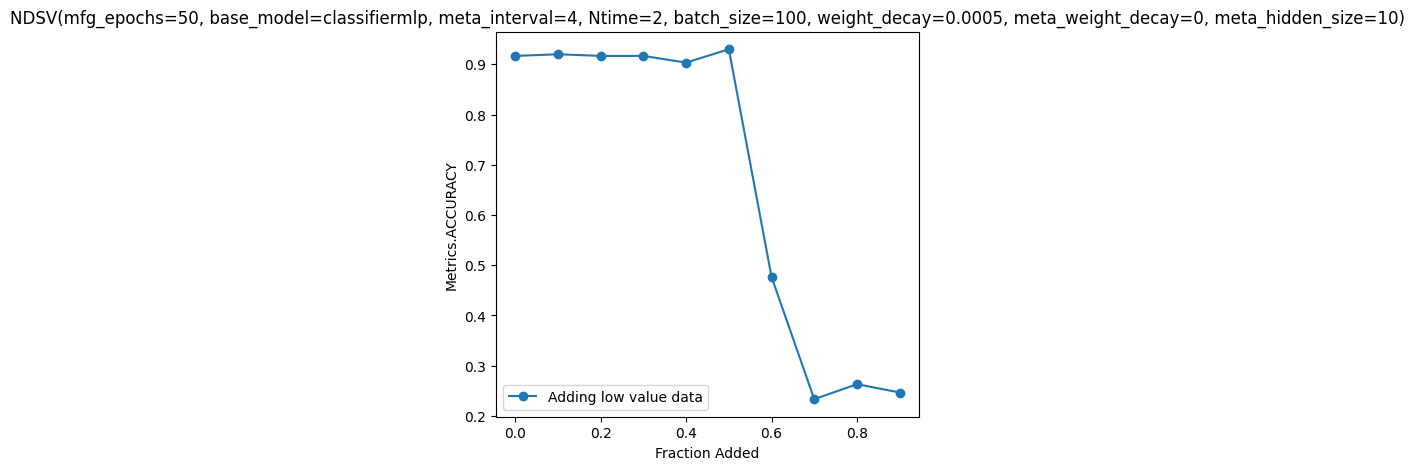

In [34]:
fig = plt.figure(figsize=(12, 5))
df, fig = exper_med.plot(add_low_value, fig, col=2, percnet=percent, save_output=True)